<h1 align="center" style="color:brown;font-size:300%">Question 1 : Multi Output Perceptron</h1>


<div class="alert alert-block alert-info" >
<b style="font-size:150%">Data set generation: We generate synthetic data<br>
</b>
</div>

In [8]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate features
age = np.random.randint(18, 70, n_samples)
time_spent = np.random.uniform(1, 60, n_samples)  # in minutes
pages_visited = np.random.randint(1, 20, n_samples)
previous_purchases = np.random.randint(0, 50, n_samples)
cart_value = np.random.uniform(0, 500, n_samples)
is_weekend = np.random.choice([0, 1], n_samples)
is_logged_in = np.random.choice([0, 1], n_samples)

# generating the data frame
df = pd.DataFrame({
    'age': age,
    'time_spent': time_spent,
    'pages_visited': pages_visited,
    'previous_purchases': previous_purchases,
    'cart_value': cart_value,
    'is_weekend': is_weekend,
    'is_logged_in': is_logged_in
})

# Generate target variables with stronger patterns
def generate_purchase_likelihood(df, category):
    if category == 'electronics':
        likelihood = (
            0.4 * (df['age'] - 18) / (70 - 18) +  # Younger people more likely
            0.3 * df['time_spent'] / 60 +
            0.2 * df['pages_visited'] / 20 +
            0.1 * df['previous_purchases'] / 50
        )
    elif category == 'clothing':
        likelihood = (
            0.3 * df['time_spent'] / 60 +
            0.3 * df['cart_value'] / 500 +
            0.2 * df['is_weekend'] +
            0.2 * df['is_logged_in']
        )
    else:  # groceries
        likelihood = (
            0.4 * df['previous_purchases'] / 50 +
            0.3 * (1 - (df['age'] - 18) / (70 - 18)) +  # Older people more likely
            0.2 * df['cart_value'] / 500 +
            0.1 * df['is_logged_in']
        )
    return np.clip(likelihood + np.random.normal(0, 0.1, len(df)), 0, 1)

df['purchase_electronics'] = (generate_purchase_likelihood(df, 'electronics') > 0.5).astype(int)
df['purchase_clothing'] = (generate_purchase_likelihood(df, 'clothing') > 0.5).astype(int)
df['purchase_groceries'] = (generate_purchase_likelihood(df, 'groceries') > 0.5).astype(int)

print(df.head())
print("\nDataset Info:")
print(df.info())

# Save to CSV for later use
df.to_csv('ecommerce_user_data.csv', index=False)
print("\nDataset saved as 'ecommerce_user_data.csv'")

# Display class distribution
print("\nClass distribution:")
for col in ['purchase_electronics', 'purchase_clothing', 'purchase_groceries']:
    print(f"{col}:")
    print(df[col].value_counts(normalize=True))
    print()

   age  time_spent  pages_visited  previous_purchases  cart_value  is_weekend  \
0   56   32.424419             19                  46  198.724078           0   
1   69   15.305760              8                  46  256.805523           0   
2   46   16.885351              5                   3  126.678585           1   
3   32   23.259766              8                   6  493.829796           1   
4   60    2.184201             12                  44  145.747870           1   

   is_logged_in  purchase_electronics  purchase_clothing  purchase_groceries  
0             0                     1                  0                   1  
1             1                     1                  0                   0  
2             1                     0                  1                   0  
3             0                     0                  1                   1  
4             1                     1                  0                   0  

Dataset Info:
<class 'pandas.core.fram

<div class="alert alert-block alert-info" >
<b style="font-size:150%">Model Class Building: <br><br>
</b>
</div>

The code implements a `MultiOutputPerceptron` class to predict multiple targets (Electronics, Clothing, Groceries) simultaneously. It initializes weights, trains the model by updating weights based on prediction errors, and evaluates the model's accuracy on synthetic e-commerce data. The data is split into training and test sets, standardized, and used to train the perceptron. Finally, decision boundaries are visualized using the first two features to illustrate the model's predictions.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Perceptron class for multiple outputs
class MOPerceptron:
    def __init__(self, in_size, out_size, lr=0.01, epochs=1000):
        # Initialize weights (with bias) for each output neuron
        self.weights = np.zeros((out_size, in_size + 1))
        self.lr = lr
        self.epochs = epochs

    def predict(self, x):
        # Add bias to the input
        x_bias = np.insert(x, 0, 1)
        # Calculate weighted sum for each output
        w_sum = np.dot(self.weights, x_bias)
        # Return 1 if weighted sum is >= 0, else 0
        return (w_sum >= 0).astype(int)

    def train(self, X, y):
        # Iterate through the dataset for given epochs
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                # Add bias to the input
                xi_bias = np.insert(xi, 0, 1)
                # Predict the output
                pred = self.predict(xi)
                # Calculate error
                error = target - pred
                # Update the weights


y = np.column_stack((y_electronics, y_clothing, y_groceries))

<div class="alert alert-block alert-info" >
<b style="font-size:150%">Train test split and standard scaling of features <br><br>
</b>
</div>

In [ ]:
# Split the data and standardize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the multi-output perceptron

In [6]:
perceptron = MultiOutputPerceptron(input_size=7, output_size=3, learning_rate=0.01, epochs=100)
perceptron.train(X_train_scaled, y_train)

# Test the multi-output perceptron

Multi-output Perceptron Accuracy: 76.00%
Accuracy for Electronics: 75.00%
Accuracy for Clothing: 77.00%
Accuracy for Groceries: 76.00%


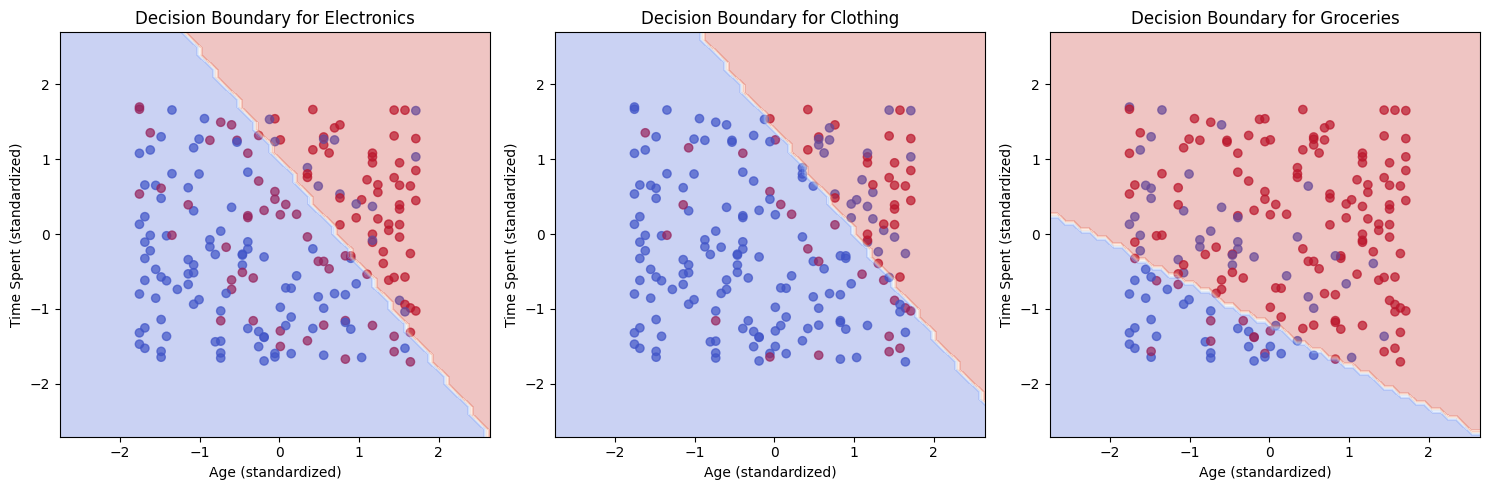

In [12]:
predictions = np.array([perceptron.predict(x) for x in X_test_scaled])
accuracy = np.mean(predictions == y_test)
print(f"Multi-output Perceptron Accuracy: {accuracy * 100:.2f}%")

# Calculate accuracy for each output
for i, category in enumerate(['Electronics', 'Clothing', 'Groceries']):
    category_accuracy = np.mean(predictions[:, i] == y_test[:, i])
    print(f"Accuracy for {category}: {category_accuracy * 100:.2f}%")

# Visualize decision boundaries (using first two features for simplicity)
plt.figure(figsize=(15, 5))
categories = ['Electronics', 'Clothing', 'Groceries']

for i, category in enumerate(categories):
    plt.subplot(1, 3, i+1)
    plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test[:, i], cmap='coolwarm', alpha=0.7)
    
    x1_min, x1_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
    x2_min, x2_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
    Z = np.array([perceptron.predict(np.array([x1, x2, 0, 0, 0, 0, 0]))[i] for x1, x2 in zip(xx1.ravel(), xx2.ravel())])
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')
    plt.xlabel('Age (standardized)')
    plt.ylabel('Time Spent (standardized)')
    plt.title(f'Decision Boundary for {category}')

plt.tight_layout()
plt.show()

# Calculate overall accuracy

Overall Accuracy: 76.00%

Category: Electronics
Precision: 85.94%
Recall: 57.29%
F1 Score: 68.75%
              precision    recall  f1-score   support

           0       0.70      0.91      0.79       104
           1       0.86      0.57      0.69        96

    accuracy                           0.75       200
   macro avg       0.78      0.74      0.74       200
weighted avg       0.78      0.75      0.74       200


Category: Clothing
Precision: 52.94%
Recall: 55.10%
F1 Score: 54.00%
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       151
           1       0.53      0.55      0.54        49

    accuracy                           0.77       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.77      0.77      0.77       200


Category: Groceries
Precision: 80.42%
Recall: 85.19%
F1 Score: 82.73%
              precision    recall  f1-score   support

           0       0.65      0.57      0.61        6

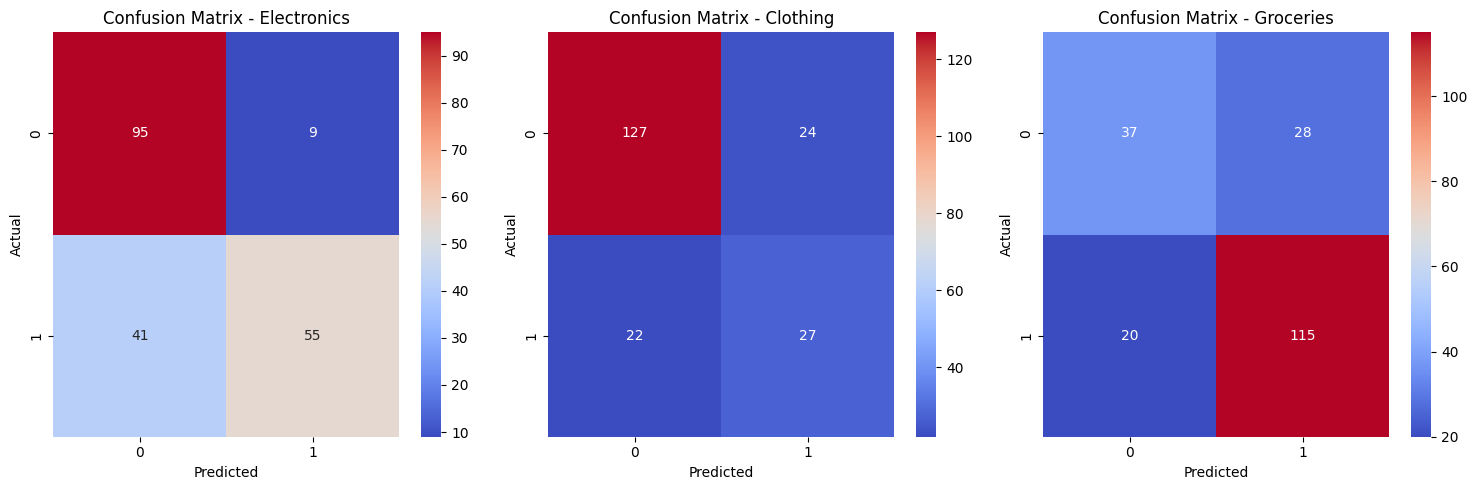

In [13]:
accuracy = np.mean(preds == y_test)
print(f"Overall Accuracy: {accuracy * 100:.2f}%")

# Calculate and print precision, recall, and F1-score for each product category
for i, cat in enumerate(['Electronics', 'Clothing', 'Groceries']):
    print(f"\nCategory: {cat}")
    print(f"Precision: {precision_score(y_test[:, i], preds[:, i]) * 100:.2f}%")
    print(f"Recall: {recall_score(y_test[:, i], preds[:, i]) * 100:.2f}%")
    print(f"F1 Score: {f1_score(y_test[:, i], preds[:, i]) * 100:.2f}%")
    # Print classification report
    print(classification_report(y_test[:, i], preds[:, i]))

# Plot confusion matrix for each category
plt.figure(figsize=(15, 5))
for i, cat in enumerate(['Electronics', 'Clothing', 'Groceries']):
    cm = confusion_matrix(y_test[:, i], preds[:, i])
    plt.subplot(1, 3, i+1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
    plt.title(f"Confusion Matrix - {cat}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

The overall accuracy of the MultiOutputPerceptron model is 76.00%, indicating that the model performs moderately well across all categories.

### Category: Electronics
- **Precision:** 85.94% indicates that when the model predicts an electronics purchase, it is correct 85.94% of the time.
- **Recall:** 57.29% suggests that the model correctly identifies 57.29% of all actual electronics purchases.
- **F1 Score:** 68.75% shows a balance between precision and recall, reflecting the model's moderate performance.

### Category: Clothing
- **Precision:** 52.94% suggests that just over half of the model's clothing predictions are correct.
- **Recall:** 55.10% indicates that the model correctly identifies a little over half of all actual clothing purchases.
- **F1 Score:** 54.00% reflects that the model struggles with predicting clothing purchases, with neither precision nor recall being particularly strong.

### Category: Groceries
- **Precision:** 80.42% means that most of the grocery predictions made by the model are correct.
- **Recall:** 85.19% indicates that the model correctly identifies most of the actual grocery purchases.
- **F1 Score:** 82.73% shows strong overall performance in predicting grocery purchases, with both precision and recall being high.


In [14]:
df.to_csv("data_q2.csv")